# scGen - Batch-Removal

This tutorial reproduces https://scgen.readthedocs.io/en/stable/tutorials/scgen_batch_removal.html with our custom Jax implementation.

In [ ]:
import scanpy as sc
import pertpy as pt

### Loading Train Data

In [3]:
train = pt.dt.kang_2018()

We need two observation labels "batch" and "cell_type" for our batch_removal procedure. There exist a "batch" obs but no "cell_type", so we add it as a .obs of adata

In [4]:
train.obs["cell_type"] = train.obs["celltype"].tolist()
sc.pp.neighbors(train)
sc.tl.umap(train)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


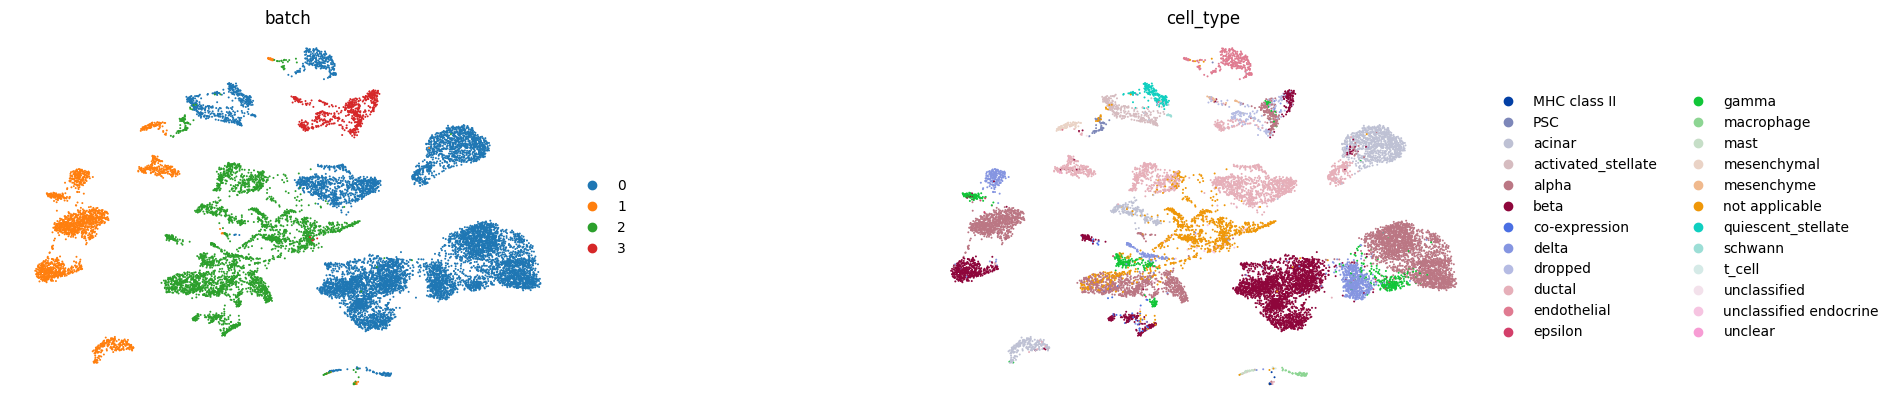

In [5]:
sc.pl.umap(train, color=["batch", "cell_type"], wspace=.5, frameon=False)

### Preprocessing Data

In [6]:
pt.tl.SCGEN.setup_anndata(train, batch_key="batch", labels_key="cell_type")

## Creating the model

In [7]:
model = pt.tl.SCGEN(train)

## Training the Model

In [8]:
model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=25,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 100/100: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [19:33<00:00, 12.60s/it, v_num=1, train_loss_step=5.68e+3, train_loss_epoch=2.37e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [19:33<00:00, 11.74s/it, v_num=1, train_loss_step=5.68e+3, train_loss_epoch=2.37e+4]


## Saving the model

In [9]:
model.save("../saved_models/model_batch_removal.pt", overwrite=True)

## Batch-Removal 

In [10]:
corrected_adata = model.batch_removal()
corrected_adata

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


AnnData object with n_obs × n_vars = 14693 × 2448
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain', 'cell_type', '_scvi_batch', '_scvi_labels', 'concat_batch'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'latent', 'corrected_latent'

### Visualization of the corrected gene expression data¶

         Falling back to preprocessing with `sc.pp.pca` and default params.


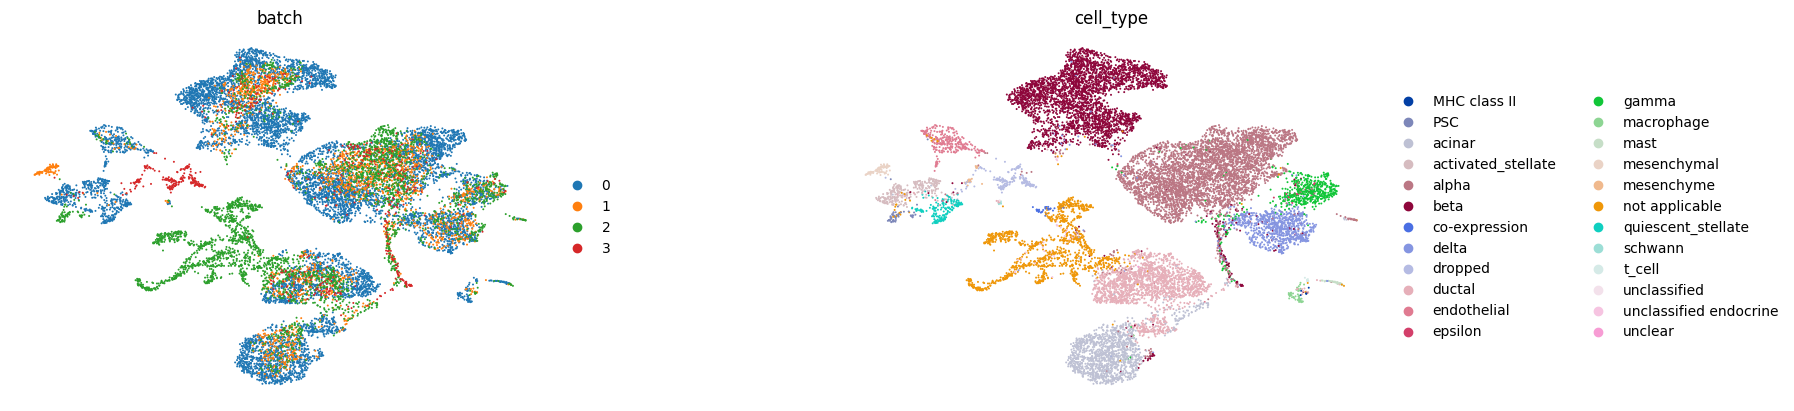

In [11]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['batch', 'cell_type'], wspace=0.4, frameon=False)

We can also use low-dim corrected gene expression data

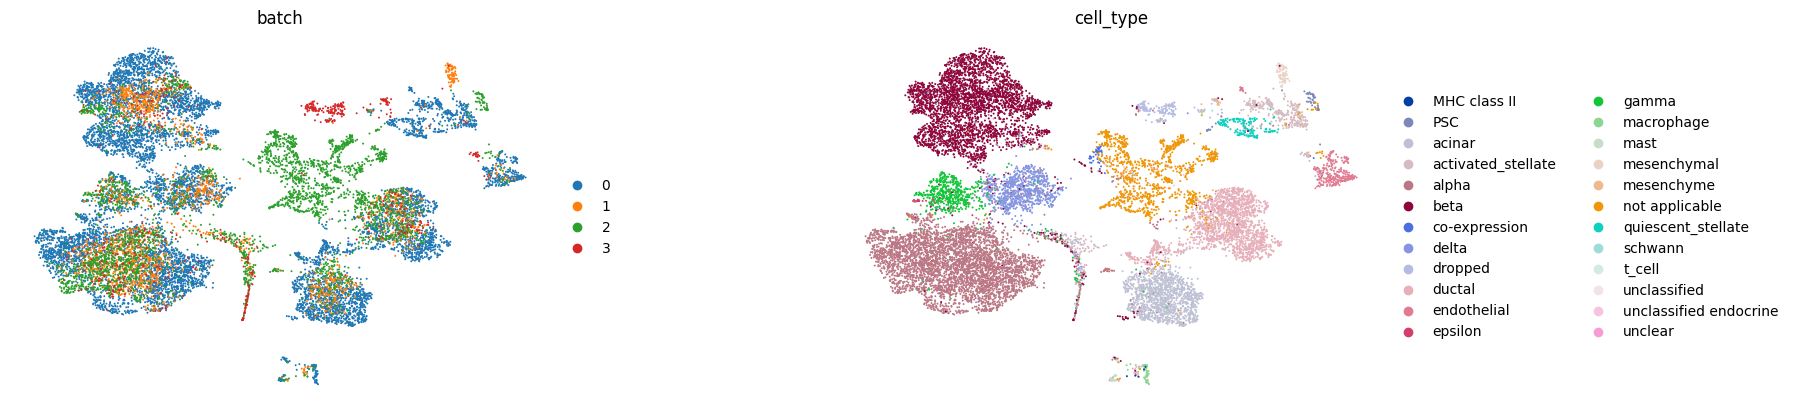

In [12]:
sc.pp.neighbors(corrected_adata, use_rep="corrected_latent")
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['batch', 'cell_type'], wspace=0.4, frameon=False)

### Using Uncorrected Data

Note that original adata.raw for the adata.raw is saved to corrected_adata.raw and you can use that for fruther analaysis

In [13]:
corrected_adata.raw

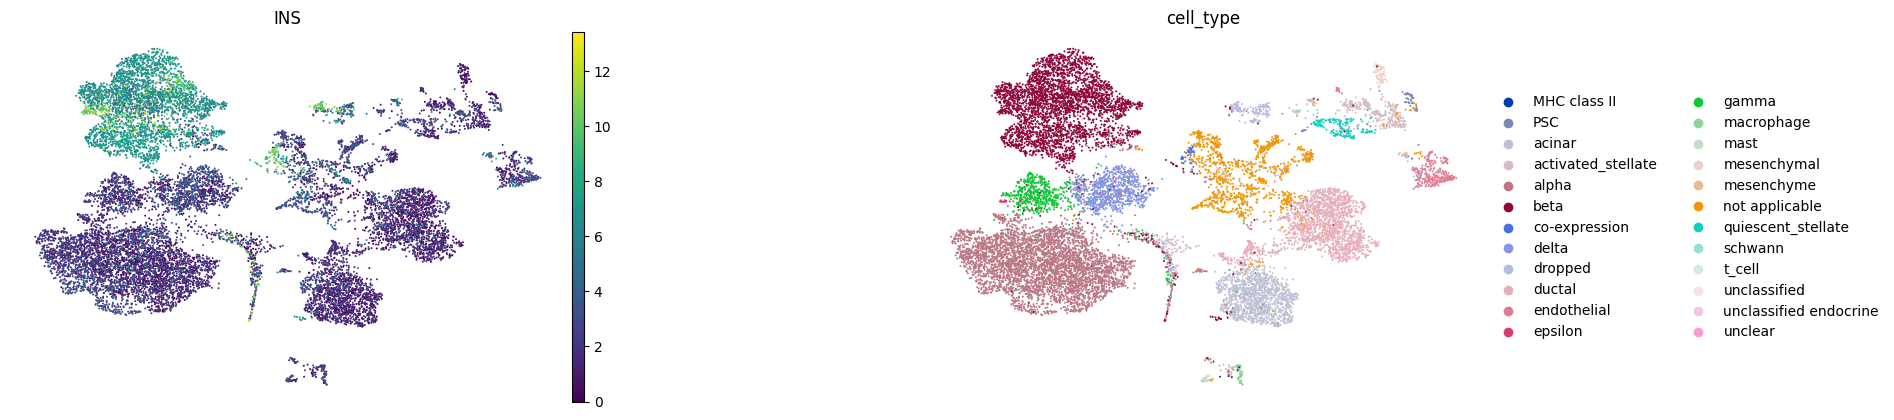

In [14]:
sc.pl.umap(corrected_adata, color=["INS", "cell_type"], wspace=.5, frameon=False, use_raw=True)
